**TRABAJO FINAL**

---

***UNIVERSIDAD DISTRITAL FRANCISCO JOSÉ DE CALDAS - FACULTAD TECNOLÓGICA***
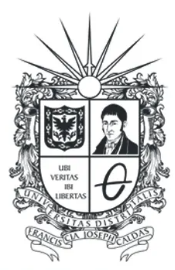
---



Erick Camilo Torres Rodriguez

20221579037

Esteban Mauricio Rodriguez

20221579046

*Teoria y logica de programación*

---


**INDICE PRESENTACIÓN 1**



1.   Importación de librerias
2.   Importación de datos
3.   Arreglo de datos
4.   Organización de datos
5.   Grafica de dispersion de datos y regresion lineal 
6.   Compracion de datos con los obtenidos en la pagina de datos abiertos Bogota
7.   datos  filtrados por departamento
8.   ejemplos



In [13]:
#se importan los pauqtese necesarios que se van a utilizar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#se importa la carpeta que esta conteniendo la informacion de los hurtos
hurtos = pd.read_csv('/content/drive/MyDrive/robos.csv')
hurtos

,FECHA HECHO,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,CANTIDAD
0,01/01/2017,5,ANTIOQUIA,5001,MEDELLIN,21
1,01/01/2017,5,ANTIOQUIA,5042,SANTAFE DE ANTIOQUIA,1
2,01/01/2017,5,ANTIOQUIA,5045,APARTADO,1
3,01/01/2017,5,ANTIOQUIA,5088,BELLO,4
4,01/01/2017,5,ANTIOQUIA,5154,CAUCASIA,1
...,...,...,...,...,...,...
241104,01/01/2023,76,VALLE DEL CAUCA,76892,YUMBO,3
241105,01/01/2023,85,CASANARE,85001,YOPAL,6
241106,01/01/2023,85,CASANARE,85010,AGUAZUL,1
241107,01/01/2023,85,CASANARE,85250,PAZ DE ARIPORO,2


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
hurtos.set_index("FECHA HECHO", inplace=True)
hurtos

,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,CANTIDAD
FECHA HECHO,,,,,
01/01/2017,5,ANTIOQUIA,5001,MEDELLIN,21
01/01/2017,5,ANTIOQUIA,5042,SANTAFE DE ANTIOQUIA,1
01/01/2017,5,ANTIOQUIA,5045,APARTADO,1
01/01/2017,5,ANTIOQUIA,5088,BELLO,4
01/01/2017,5,ANTIOQUIA,5154,CAUCASIA,1
...,...,...,...,...,...
01/01/2023,76,VALLE DEL CAUCA,76892,YUMBO,3
01/01/2023,85,CASANARE,85001,YOPAL,6
01/01/2023,85,CASANARE,85010,AGUAZUL,1


In [17]:
hurtos.index

Index(['01/01/2017', '01/01/2017', '01/01/2017', '01/01/2017', '01/01/2017',
       '01/01/2017', '01/01/2017', '01/01/2017', '01/01/2017', '01/01/2017',
       ...
       '01/01/2023', '01/01/2023', '01/01/2023', '01/01/2023', '01/01/2023',
       '01/01/2023', '01/01/2023', '01/01/2023', '01/01/2023', '01/01/2023'],
      dtype='object', name='FECHA HECHO', length=241109)

In [18]:
hurtos.index = pd.to_datetime(hurtos.index)
hurtos.index

<ipython-input-18-56cfa577ca92>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  hurtos.index = pd.to_datetime(hurtos.index)


DatetimeIndex(['2017-01-01', '2017-01-01', '2017-01-01', '2017-01-01',
               '2017-01-01', '2017-01-01', '2017-01-01', '2017-01-01',
               '2017-01-01', '2017-01-01',
               ...
               '2023-01-01', '2023-01-01', '2023-01-01', '2023-01-01',
               '2023-01-01', '2023-01-01', '2023-01-01', '2023-01-01',
               '2023-01-01', '2023-01-01'],
              dtype='datetime64[ns]', name='FECHA HECHO', length=241109, freq=None)

In [19]:
hurtos = hurtos.reset_index()

In [20]:
# Se cambia el nombre de la columna en los datos para que no nos salga error
hurtos_nuevo = hurtos.rename(columns={
    "FECHA HECHO": "Fecha"
})
hurtos_nuevo

,Fecha,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,CANTIDAD
0,2017-01-01,5,ANTIOQUIA,5001,MEDELLIN,21
1,2017-01-01,5,ANTIOQUIA,5042,SANTAFE DE ANTIOQUIA,1
2,2017-01-01,5,ANTIOQUIA,5045,APARTADO,1
3,2017-01-01,5,ANTIOQUIA,5088,BELLO,4
4,2017-01-01,5,ANTIOQUIA,5154,CAUCASIA,1
...,...,...,...,...,...,...
241104,2023-01-01,76,VALLE DEL CAUCA,76892,YUMBO,3
241105,2023-01-01,85,CASANARE,85001,YOPAL,6
241106,2023-01-01,85,CASANARE,85010,AGUAZUL,1
241107,2023-01-01,85,CASANARE,85250,PAZ DE ARIPORO,2


Adicional a esto se importan datos desde la pagina de la www.datos.gov.co. En dicha pagina se consiguieron los datos de los hurtos registrados hasta Abril de el año 2023. esto nos ayudara a hacer la compracion con la regresion que obtengamos de los datos. 

In [21]:
import pandas as pd
hurtos_2023=pd.read_excel("/content/drive/MyDrive/HURTO_PERSONAS.xlsx")
hurtos_2023

,FECHA HECHO,DEPARTAMENTO,MUNICIPIO,CANTIDAD
0,2023-01-31,ANTIOQUIA,MEDELLIN,93
1,2023-01-31,ANTIOQUIA,ALEJANDRIA,1
2,2023-01-31,ANTIOQUIA,BELLO,5
3,2023-01-31,ANTIOQUIA,CALDAS,1
4,2023-01-31,ANTIOQUIA,ENVIGADO,4
...,...,...,...,...
11253,2023-03-31,VALLE DEL CAUCA,JAMUNDI,1
11254,2023-03-31,VALLE DEL CAUCA,PALMIRA,1
11255,2023-03-31,VALLE DEL CAUCA,TULUA,1
11256,2023-03-31,VALLE DEL CAUCA,YUMBO,1


En este caso para esta actividad usaremos datos desde el 2021 hasta el 2023, para poder hacer las regresiones de los datos.

In [22]:
hurtos_2021_2023 = hurtos_nuevo.query("Fecha >= '2021-01-01' and Fecha <= '2023-12-31'").sort_values("Fecha")
hurtos_2021_2023

,Fecha,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,CANTIDAD
149838,2021-01-01,5,ANTIOQUIA,5001,MEDELLIN,13
149914,2021-01-01,68,SANTANDER,68081,BARRANCABERMEJA,5
149913,2021-01-01,68,SANTANDER,68001,BUCARAMANGA,2
149912,2021-01-01,66,RISARALDA,66170,DOSQUEBRADAS,1
149911,2021-01-01,66,RISARALDA,66001,PEREIRA,3
...,...,...,...,...,...,...
239521,2023-12-01,66,RISARALDA,66170,DOSQUEBRADAS,6
239522,2023-12-01,66,RISARALDA,66682,SANTA ROSA DE CABAL,2
239523,2023-12-01,68,SANTANDER,68001,BUCARAMANGA,22
239525,2023-12-01,68,SANTANDER,68167,CHARALA,1


A continuacion se realiza la grafica de dispersion de los puntos y adicional a esto la grafica de la respectiva regresion lineal para todos los datos de los robos que tuvieron lugar en le periodo de timpo del año 2021 hasta inicios del 2023.
Se pueden apreciar que al presnetarse una gran cantidad de datos la mayoria de ellos se encuentran en entre 0 y 100, esto puede ser a que debido a la gran presencia de datos el porcentaje de los que estan entre 0 y 100 son mayores, ya que los lugares de poca afuecia de gnte es donde se puede llegar a presentar menos cantidad de robos.


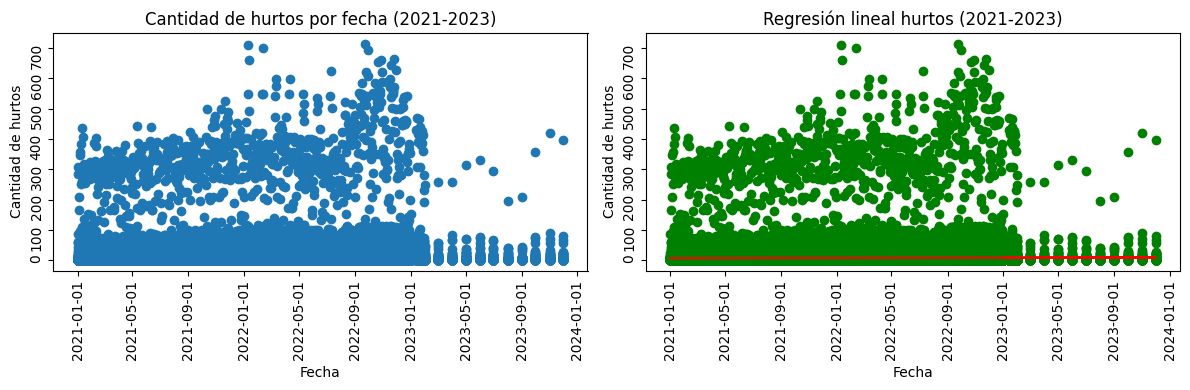

Varianza de los residuos: 1109.4187909705784


<Figure size 640x480 with 0 Axes>

In [68]:
# se importan las librearias necesarias para poder hacer la respectiva regresion
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# Convertir la columna de fecha a valores numéricos
x = mdates.date2num(hurtos_2021_2023['Fecha'])
y = hurtos_2021_2023['CANTIDAD']
# Crear el modelo de regresión lineal
lr_model = LinearRegression()
lr_model.fit(x.reshape(-1, 1), y)
y_pred = lr_model.predict(x.reshape(-1, 1))
# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
# Gráfico de dispersión
ax1.scatter(hurtos_2021_2023['Fecha'], y)
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Cantidad de hurtos')
ax1.set_title('Cantidad de hurtos por fecha (2021-2023)')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.tick_params(rotation=90)
# Gráfico de regresión lineal
ax2.scatter(hurtos_2021_2023['Fecha'], y, color='green')
ax2.plot(hurtos_2021_2023['Fecha'], y_pred, color='red')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Cantidad de hurtos')
ax2.set_title('Regresión lineal hurtos (2021-2023)')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax2.xaxis.set_major_locator(mdates.AutoDateLocator())
ax2.tick_params(rotation=90)
# Ajustar los subplots
plt.tight_layout()
# Mostrar la figura con las dos gráficas
plt.show()
# Calcular los residuos (diferencia entre los valores reales y los valores predichos)
residuos = y - y_pred
# Calcular la varianza de los residuos
varianza = np.var(residuos)
# Imprimir la varianza
print("Varianza de los residuos:", varianza)
# Calcular el coeficiente de determinación (R cuadrado)
r2 = lr_model.score(x.reshape(-1, 1), y)
# Ajustar los subplots
plt.tight_layout()
# Mostrar la figura con las dos gráficas
plt.show()

Despues de esto se realiza la compracion de los datos obtenidos de la pagina de la pagina con respecto a la regresion realizada.

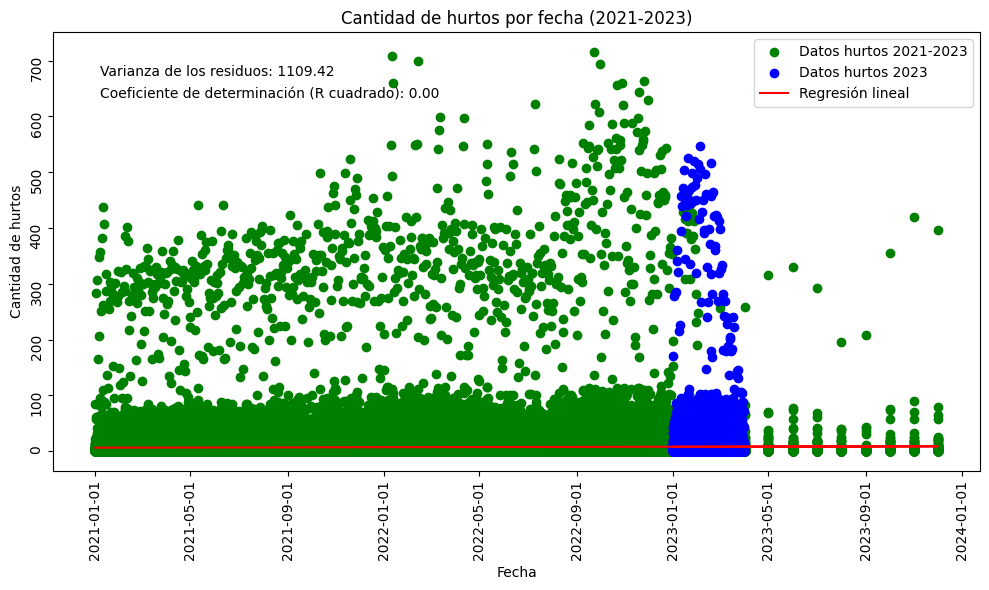

In [70]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Convertir las fechas a formato numérico
x_dates_2022_2023 = mdates.date2num(hurtos_2021_2023['Fecha'])
x_dates_2023 = mdates.date2num(hurtos_2023['FECHA HECHO'])

# Definir los datos para el eje y (cantidad de hurtos)
y_2022_2023 = hurtos_2021_2023['CANTIDAD']
y_2023 = hurtos_2023['CANTIDAD']

# Calcular la varianza
residuos = y_2022_2023 - y_pred
varianza = np.var(residuos)

# Calcular el coeficiente de determinación (R cuadrado)
SSR = np.sum((y_pred - np.mean(y_2022_2023))**2)
SST = np.sum((y_2022_2023 - np.mean(y_2022_2023))**2)
r2 = SSR / SST

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar los datos de hurtos_2022_2023
ax.scatter(x_dates_2022_2023, y_2022_2023, color='green', label='Datos hurtos 2021-2023')

# Graficar los datos de hurtos_2023
ax.scatter(x_dates_2023, y_2023, color='blue', label='Datos hurtos 2023')

# Graficar la línea de regresión
ax.plot(x_dates_2022_2023, y_pred, color='red', label='Regresión lineal')

# Configurar los ejes y título del gráfico
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de hurtos')
ax.set_title('Cantidad de hurtos por fecha (2021-2023)')
# Formato de fecha en el eje x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
# Rotación de las etiquetas del eje x
ax.tick_params(rotation=90)
# Leyenda
ax.legend()
# Añadir información sobre varianza y R cuadrado
ax.text(0.05, 0.9, f"Varianza de los residuos: {varianza:.2f}", transform=ax.transAxes)
ax.text(0.05, 0.85, f"Coeficiente de determinación (R cuadrado): {r2:.2f}", transform=ax.transAxes)
# Ajustar los subplots
plt.tight_layout()
# Mostrar la gráfica
plt.show()





 Regresion por lugares.

Debido a la cantidad de datos es dificil poder visualizar de manera adecuada una regresion, por ende optamos por hacerlos enalgunas ciudades.

In [37]:
# Filtrar los datos solo para Bogotya
hurtos_2023_BOGOTA = hurtos_2023.query("MUNICIPIO == 'BOGOTA, D.C.'")
# Mostrar los datos filtrados
print()

In [38]:
hurtos_2022_2023_BOGOTA = hurtos_nuevo.query("Fecha >= '2021-01-01' and Fecha <= '2023-06-15' and MUNICIPIO == 'BOGOTA, D.C.'").sort_values("Fecha")
hurtos_2022_2023_BOGOTA

,Fecha,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,CANTIDAD
149856,2021-01-01,11,BOGOTÁ D.C.,11001,"BOGOTA, D.C.",85
152976,2021-01-02,11,BOGOTÁ D.C.,11001,"BOGOTA, D.C.",284
155965,2021-01-03,11,BOGOTÁ D.C.,11001,"BOGOTA, D.C.",307
159392,2021-01-04,11,BOGOTÁ D.C.,11001,"BOGOTA, D.C.",166
162460,2021-01-05,11,BOGOTÁ D.C.,11001,"BOGOTA, D.C.",207
...,...,...,...,...,...,...
240839,2023-02-01,11,BOGOTÁ D.C.,11001,"BOGOTA, D.C.",247
240701,2023-03-01,11,BOGOTÁ D.C.,11001,"BOGOTA, D.C.",257
240572,2023-04-01,11,BOGOTÁ D.C.,11001,"BOGOTA, D.C.",259
240425,2023-05-01,11,BOGOTÁ D.C.,11001,"BOGOTA, D.C.",315


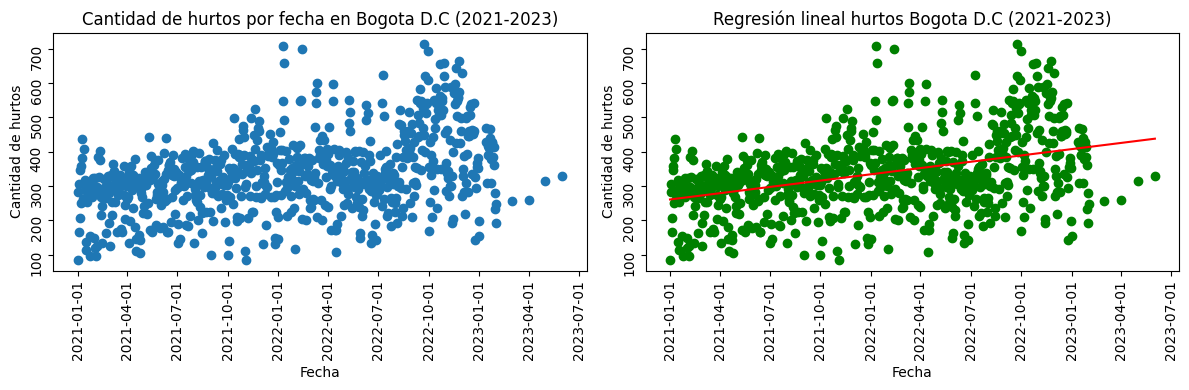

In [39]:
# se importan las librearias necesarias para poder hacer la respectiva regresion
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# Convertir la columna de fecha a valores numéricos
x = mdates.date2num(hurtos_2022_2023_BOGOTA['Fecha'])
y = hurtos_2022_2023_BOGOTA['CANTIDAD']
# Crear el modelo de regresión lineal
lr_model = LinearRegression()
lr_model.fit(x.reshape(-1, 1), y)
y_pred = lr_model.predict(x.reshape(-1, 1))
# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
# Gráfico de dispersión
ax1.scatter(hurtos_2022_2023_BOGOTA['Fecha'], y)
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Cantidad de hurtos')
ax1.set_title('Cantidad de hurtos por fecha en Bogota D.C (2021-2023)')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.tick_params(rotation=90)
# Gráfico de regresión lineal
ax2.scatter(hurtos_2022_2023_BOGOTA['Fecha'], y, color='green')
ax2.plot(hurtos_2022_2023_BOGOTA['Fecha'], y_pred, color='red')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Cantidad de hurtos')
ax2.set_title('Regresión lineal hurtos Bogota D.C (2021-2023)')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax2.xaxis.set_major_locator(mdates.AutoDateLocator())
ax2.tick_params(rotation=90)
# Ajustar los subplots
plt.tight_layout()
# Mostrar la figura con las dos gráficas
plt.show()

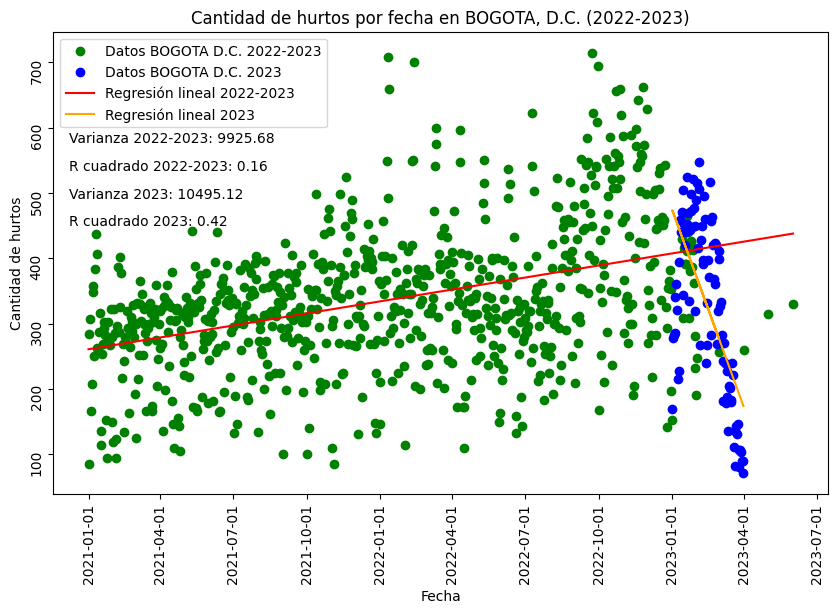

In [82]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Filtrar los datos para el periodo y ubicación deseada en hurtos_2023_BOGOTA
hurtos_2023_BOGOTA_filtered = hurtos_2023_BOGOTA.query("MUNICIPIO == 'BOGOTA, D.C.'")

# Convertir las fechas a formato numérico
x_dates_2022_2023 = mdates.date2num(hurtos_2022_2023_BOGOTA['Fecha'])
x_dates_2023 = mdates.date2num(hurtos_2023_BOGOTA_filtered['FECHA HECHO'])

# Definir los datos para el eje y (cantidad de hurtos)
y_2022_2023 = hurtos_2022_2023_BOGOTA['CANTIDAD']
y_2023 = hurtos_2023_BOGOTA_filtered['CANTIDAD']

# Ajustar los datos a un polinomio de grado 1
coefficients_2022_2023 = np.polyfit(x_dates_2022_2023, y_2022_2023, 1)
poly_2022_2023 = np.poly1d(coefficients_2022_2023)

# Ajustar los datos a un polinomio de grado 1
coefficients_2023 = np.polyfit(x_dates_2023, y_2023, 1)
poly_2023 = np.poly1d(coefficients_2023)

# Calcular los valores predichos para el polinomio ajustado
y_pred_2022_2023 = poly_2022_2023(x_dates_2022_2023)
y_pred_2023 = poly_2023(x_dates_2023)

# Calcular los residuos (diferencia entre los valores reales y los valores predichos)
residuos_2022_2023 = y_2022_2023 - y_pred_2022_2023
residuos_2023 = y_2023 - y_pred_2023

# Calcular la varianza de los residuos
varianza_2022_2023 = np.var(residuos_2022_2023)
varianza_2023 = np.var(residuos_2023)

# Calcular el coeficiente de determinación (R cuadrado)
ssr_2022_2023 = np.sum(residuos_2022_2023**2)
sst_2022_2023 = np.sum((y_2022_2023 - np.mean(y_2022_2023))**2)
r2_2022_2023 = 1 - (ssr_2022_2023 / sst_2022_2023)

ssr_2023 = np.sum(residuos_2023**2)
sst_2023 = np.sum((y_2023 - np.mean(y_2023))**2)
r2_2023 = 1 - (ssr_2023 / sst_2023)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar los datos de hurtos_2022_2023_BOGOTA
ax.scatter(x_dates_2022_2023, y_2022_2023, color='green', label='Datos BOGOTA D.C. 2022-2023')

# Graficar los datos de hurtos_2023_BOGOTA
ax.scatter(x_dates_2023, y_2023, color='blue', label='Datos BOGOTA D.C. 2023')

# Graficar la línea de regresión 2022-2023
ax.plot(x_dates_2022_2023, y_pred_2022_2023, color='red', label='Regresión lineal 2022-2023')

# Graficar la línea de regresión 2023
ax.plot(x_dates_2023, y_pred_2023, color='orange', label='Regresión lineal 2023')

# Configurar los ejes y título del gráfico
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de hurtos')
ax.set_title('Cantidad de hurtos por fecha en BOGOTA, D.C. (2022-2023)')

# Mostrar la varianza y el coeficiente de determinación en el gráfico
ax.text(0.02, 0.76, f'Varianza 2022-2023: {varianza_2022_2023:.2f}', transform=ax.transAxes)
ax.text(0.02, 0.70, f'R cuadrado 2022-2023: {r2_2022_2023:.2f}', transform=ax.transAxes)
ax.text(0.02, 0.64, f'Varianza 2023: {varianza_2023:.2f}', transform=ax.transAxes)
ax.text(0.02, 0.58, f'R cuadrado 2023: {r2_2023:.2f}', transform=ax.transAxes)

# Formato de fecha en el eje x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

# Rotación de las etiquetas del eje x
ax.tick_params(rotation=90)

# Leyenda
ax.legend()

# Mostrar la gráfica
plt.show()
